# <center>FOOTBALL PLAYER PERFORMANCE AND POTENTIAL ANALYSIS</center>

## INTRODUCTION

#### Project Goals and Objectives

Football Player Performance & Potential Analysis is a project to analyse the performance of football players from the top 5 leagues in Europe in the 2023/2024 season. The goal of the project is to evaluate how football players in the these leagues performed in the 2023/2024 season, focusing on key metrics such as goals, assists, defensive actions, and other relevant performance indicators and to compare real-life player statistics with their potential ratings provided by EA Sports to identify:
- **Overperformers**: Players whose real-life stats exceed their EA ratings.
- **Underperformers**: Players with high EA potential but lower-than-expected real-life performance.

#### Dataset Descriptions

##### 1. Top 5 Leagues Dataset
This dataset contains performance statistics for players in the top 5 European football leagues (Premier League, La Liga, Serie A, Bundesliga, Ligue 1) during the 2023/2024 season. It includes detailed player statistics such as goals, assists, defensive actions, and passing accuracy. Key features in the dataset include:
- **Player Name**: The full name of the player.
- **Position**: The player’s field position (e.g., midfielder, striker).
- **Goals**: Total goals scored during the season.
- **Assists**: Number of assists provided.
- **Minutes Played**: Total minutes the player has been on the fiel#d.

#### 2. EA Sports Dataset
This dataset contains the FIFA 2024 ratings and potential scores for football players globally. It includes attributes like pace, dribbling, shooting, and physicality, as well as an overall potential rating that predicts a player’s growth over time. Key features include:
- **Overall Rating**: A score representing the player's overall skill level.
- **Potential Rating**: A projection of the player’s future potential.
- **Physical Attributes**: Metrics such as height, strength, and stamina.
- **Technical Skills**: Ratings for skills like passing, shooting, and dribbling.


#### Key Questions & Hypotheses

As we delve into the comparison between real-life player performance and their potential as rated by EA Sports, the following key questions and hypotheses will guide our analysis:

1. **Are high-potential players performing better in real life?**
   - Hypothesis: Players with higher potential ratings in EA Sports are more likely to perform well in real-life matches (e.g., scoring more goals or providing more assists).
   - Investigative Question: Do players with an EA potential rating above 85 show statistically better real-life performance in terms of goals, assists, and key defensive actions?

2. **Which players are over-performing their potential?**
   - Hypothesis: Some players may outperform their EA Sports potential rating, indicating they are undervalued or underrated in the game.
   - Investigative Question: Are there players with an EA potential rating below 80 who have exceeded expectations by delivering top-tier real-life performances?

3. **Are younger players (under 23) living up to their potential?**
   - Hypothesis: Younger players with high potential ratings are expected to show significant real-life growth, especially in the top 5 leagues.
   - Investigative Question: How do real-life performances of young players under 23 years old compare to their EA potential ratings? Are they meeting or exceeding expectations?

4. **What is the relationship between a player's position and their real-life vs potential performance?**
   - Hypothesis: Certain positions (e.g., forwards or midfielders) may have a stronger correlation between EA potential ratings and real-life performance.
   - Investigative Question: Does a forward with a high potential rating (e.g., above 90) show a greater impact on goals and assists than a similarly rated defender’s impact on defensive metrics?

5. **Do players from certain leagues consistently outperform or underperform their potential?**
   - Hypothesis: Players from specific leagues (e.g., Premier League, La Liga) may perform closer to their EA potential compared to players in other leagues.
   - Investigative Question: Are players in the Premier League more likely to meet or exceed their potential ratings compared to those in Serie A or Bundesliga?


## DATA LOADING AND INITIAL EXPLORATION
- Load both datasets using pandas.
- Display basic information about the datasets (.info(), .describe(), .head()).
- Show initial visualizations to understand data distributions (e.g., histograms for goals, assists).

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
from rapidfuzz import fuzz
from rapidfuzz import process
# Reset display options to default, then change again
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [149]:
## Load Dataset
stats = pd.read_csv("C:/Users/Welcome Sir/Documents/Python Scripts/Projects/Football Player Performance & Potential Analysis/Data/2022-23 Player Stats Big 5 Leagues.csv")
ea = pd.read_csv("C:/Users/Welcome Sir/Documents/Python Scripts/Projects/Football Player Performance & Potential Analysis/Data/male_players (legacy).csv", dtype={'rb': str}, low_memory=False)

In [150]:
## Load Dataset
stats = stats.copy()
ea_sports = ea.copy()

In [110]:
def info(data):
    df_info = pd.DataFrame({
        'Non-Null Count': data.notnull().sum(),
        'Data Type': data.dtypes
    })
    print(df_info)
    return df_info

In [111]:
stats_info = info(stats)
ea_info = info(ea_sports)
print(stats_info)
print(ea_info)

                               Non-Null Count Data Type
Squad                                    3317    object
Comp                                     3317    object
Player                                   3317    object
Nation                                   3313    object
Pos                                      3317    object
Age                                      3317     int64
Born                                     3317     int64
MP                                       3317     int64
Minutes_Played                           2703   float64
Mn_per_MP                                2703   float64
Mins_Per_90                              2705   float64
Starts                                   3317     int64
PPM_Team.Success                         2705   float64
onG_Team.Success                         2705   float64
onGA_Team.Success                        2705   float64
plus_per__minus__Team.Success            2705   float64
Goals                                    2721   

In [112]:
stats.head()

Squad     Comp            Player Nation    Pos  Age  Born  MP  \
0  Ajaccio  Ligue 1  Mickaël Alphonse    GLP     DF   33  1989  26   
1  Ajaccio  Ligue 1     Cédric Avinel    GLP     DF   35  1986  24   
2  Ajaccio  Ligue 1   Mickaël Barreto    FRA     MF   31  1991  20   
3  Ajaccio  Ligue 1    Cyrille Bayala    BFA     MF   26  1996  33   
4  Ajaccio  Ligue 1    Youcef Belaïli    ALG  MF,FW   30  1992  17   

   Minutes_Played  Mn_per_MP  Mins_Per_90  Starts  PPM_Team.Success  \
0          1361.0       52.0         15.1      14              0.73   
1          1794.0       75.0         19.9      19              0.63   
2          1325.0       66.0         14.7      15              0.60   
3          2009.0       61.0         22.3      25              0.76   
4          1150.0       68.0         12.8      15              0.88   

   onG_Team.Success  onGA_Team.Success  plus_per__minus__Team.Success  Goals  \
0               7.0               30.0                          -23.0    0.0   
1              11.0               40.0                          -29.0    1.0   
2               6.0               34.0                          -28.0    1.0   
3               8.0               42.0                          -34.0    1.0   
4              12.0               23.0                          -11.0    6.0   

   Assists  GoalsAssistsCombined  NonPKG   PK  PKatt  CrdY  CrdR   xG  xAG  \
0      0.0                   0.0     0.0  0.0    0.0   2.0   1.0  0.5  0.7   
1      0.0                   1.0     1.0  0.0    0.0   2.0   1.0  1.0  0.0   
2      1.0                   2.0     1.0  0.0    0.0   1.0   0.0  0.9  1.9   
3      1.0                   2.0     1.0  0.0    0.0   3.0   1.0  2.0  2.0   
4      3.0                   9.0     1.0  5.0    6.0   2.0   0.0  6.2  3.5   

   npxG+xAG  PrgC  PrgP  Gls_Per90  Ast_Per90  G+A_Per90  G_minus_PK_Per  \
0       1.2  30.0  51.0       0.00       0.00       0.00            0.00   
1       1.0   3.0  31.0       0.05       0.00       0.05            0.05   
2       2.8  26.0  87.0       0.07       0.07       0.14            0.07   
3       4.1  46.0  66.0       0.04       0.04       0.09            0.04   
4       5.3  32.0  55.0       0.47       0.23       0.70            0.08   

   G+A_minus_PK_Per  xG_Per  xAG_Per  xG+xAG_Per  Shots  Shots_on_Target  \
0              0.00    0.03     0.04        0.08   10.0              2.0   
1              0.05    0.05     0.00        0.05    3.0              1.0   
2              0.14    0.06     0.13        0.19   19.0              4.0   
3              0.09    0.09     0.09        0.18   22.0              6.0   
4              0.31    0.48     0.27        0.76   27.0              9.0   

   SoT_percent  G_per_Sh  G_per_SoT  Avg_Shot_Dist  FK_Standard  \
0         20.0      0.00       0.00           16.3          0.0   
1         33.3      0.33       1.00            4.1          0.0   
2         21.1      0.05       0.25           26.6          3.0   
3         27.3      0.05       0.17           15.2          0.0   
4         33.3      0.04       0.11           24.8          4.0   

   G_minus_xG_Expected  np:G_minus_xG_Expected  Passes_Completed  \
0                 -0.5                    -0.5             448.0   
1                  0.0                     0.0             607.0   
2                  0.1                     0.1             481.0   
3                 -1.0                    -1.0             399.0   
4                 -0.2                    -0.8             328.0   

   Passes_Attempted  Passes_Cmp_percent  PrgDist_Total  Passes_Cmp_Short  \
0             686.0                65.3         3413.0             197.0   
1             714.0                85.0         4107.0             174.0   
2             695.0                69.2         3373.0             205.0   
3             654.0                61.0         2291.0             219.0   
4             458.0                71.6         2159.0             162.0   

   Passes_Att_Short  Pas

- I don't like the format used to represent the countries   >>>>>
- Drop unnecessary columns   >>>>>
- change datatypes of some columns   >>>>>
- Some of the column names should be renamed   >>>>>
- Handle missing values   >>>>>
- Check for duplicates   >>>>>

In [36]:
ea_sports.head()

player_id                                        player_url  fifa_version  \
0     158023                /player/158023/lionel-messi/150002            15   
1      20801  /player/20801/c-ronaldo-dos-santos-aveiro/150002            15   
2       9014                  /player/9014/arjen-robben/150002            15   
3      41236           /player/41236/zlatan-ibrahimovic/150002            15   
4     167495                /player/167495/manuel-neuer/150002            15   

   fifa_update fifa_update_date         short_name  \
0            2       2014-09-18           L. Messi   
1            2       2014-09-18  Cristiano Ronaldo   
2            2       2014-09-18          A. Robben   
3            2       2014-09-18     Z. Ibrahimović   
4            2       2014-09-18           M. Neuer   

                             long_name player_positions  overall  potential  \
0       Lionel Andrés Messi Cuccittini               CF       93         95   
1  Cristiano Ronaldo dos Santos Aveiro           LW, LM       92         92   
2                         Arjen Robben       RM, LM, RW       90         90   
3                   Zlatan Ibrahimović               ST       90         90   
4                   Manuel Peter Neuer               GK       90         90   

     value_eur  wage_eur  age         dob  height_cm  weight_kg  league_id  \
0  100500000.0  550000.0   27  1987-06-24        169         67       53.0   
1   79000000.0  375000.0   29  1985-02-05        185         80       53.0   
2   54500000.0  275000.0   30  1984-01-23        180         80       19.0   
3   52500000.0  275000.0   32  1981-10-03        195         95       16.0   
4   63500000.0  300000.0   28  1986-03-27        193         92       19.0   

  league_name  league_level  club_team_id            club_name club_position  \
0     La Liga           1.0         241.0         FC Barcelona            CF   
1     La Liga           1.0         243.0       Real Madrid CF            LW   
2  Bundesliga           1.0          21.0    FC Bayern München           SUB   
3     Ligue 1           1.0          73.0  Paris Saint-Germain            ST   
4  Bundesliga           1.0          21.0    FC Bayern München            GK   

   club_jersey_number club_loaned_from club_joined_date  \
0                10.0              NaN       2004-07-01   
1                 7.0              NaN       2009-07-01   
2                10.0              NaN       2009-08-28   
3                10.0              NaN       2012-07-01   
4                 1.0              NaN       2011-07-01   

   club_contract_valid_until_year  nationality_id nationality_name  \
0                          2018.0              52        Argentina   
1                          2018.0              38         Portugal   
2                          2017.0              34      Netherlands   
3                          2016.0              46           Sweden   
4                          2019.0              21          Germany   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              CF                  10.0           Left   
1          1354.0              LW                   7.0          Right   
2        105035.0              RS                  11.0           Left   
3          1363.0              ST                  10.0          Right   
4          1337.0              GK                   1.0          Right   

   weak_foot  skill_moves  international_reputation      work_rate  \
0          3            4                         5     Medium/Low   
1          4            5                         5       High/Low   
2          2            4                         5       High/Low   
3          4            4                         5     Medium/Low   
4          4            1                         5  Medium/Medium   

          body_type real_face  release_clause_eur  \
0     Normal (170-)       Yes                 NaN   
1     Normal (185+)     

- some columns that are not necassary will be dropped   >>>>>
- the +3 on the last 27 columns will be removed except the last column   >>>>>
- Handle missing values or NaN values   >>>>>
- The data types of some columns will be changed from float to int, like the contract expiration column   >>>>>
- Interested in only the 23 fifa update   >>>>>
- Check for duplicates   >>>>>

In [37]:
stats.describe()

Age         Born           MP  Minutes_Played    Mn_per_MP  \
count  3317.000000  3317.000000  3317.000000     2703.000000  2703.000000   
mean     24.456135  1997.196262    16.223395     1282.686275    55.367000   
std       4.940382     4.942591    13.141907      992.394128    25.616643   
min      15.000000  1981.000000     0.000000        1.000000     1.000000   
25%      20.000000  1994.000000     2.000000      336.500000    36.000000   
50%      24.000000  1998.000000    16.000000     1160.000000    59.000000   
75%      28.000000  2001.000000    29.000000     2081.500000    78.000000   
max      41.000000  2007.000000    38.000000     3420.000000    90.000000   

       Mins_Per_90       Starts  PPM_Team.Success  onG_Team.Success  \
count  2705.000000  3317.000000       2705.000000       2705.000000   
mean     14.240665    11.636418          1.319046         19.763771   
std      11.029356    11.858987          0.657074         17.642866   
min       0.000000     0.000000          0.000000          0.000000   
25%       3.700000     0.000000          0.930000          4.000000   
50%      12.900000     8.000000          1.270000         16.000000   
75%      23.100000    22.000000          1.730000         31.000000   
max      38.000000    38.000000          3.000000         89.000000   

       onGA_Team.Success  plus_per__minus__Team.Success        Goals  \
count        2705.000000                    2705.000000  2721.000000   
mean           19.615527                       0.148244     1.727306   
std            15.798169                      12.542878     3.206018   
min             0.000000                     -46.000000     0.000000   
25%             6.000000                      -5.000000     0.000000   
50%            17.000000                      -1.000000     0.000000   
75%            30.000000                       4.000000     2.000000   
max            78.000000                      58.000000    36.000000   

           Assists  GoalsAssistsCombined       NonPKG           PK  \
count  2721.000000           2721.000000  2721.000000  2721.000000   
mean      1.206174              2.933480     1.570011     0.157295   
std       1.936619              4.562513     2.828356     0.697864   
min       0.000000              0.000000     0.000000     0.000000   
25%       0.000000              0.000000     0.000000     0.000000   
50%       0.000000              1.000000     0.000000     0.000000   
75%       2.000000              4.000000     2.000000     0.000000   
max      16.000000             44.000000    29.000000    10.000000   

             PKatt         CrdY         CrdR           xG          xAG  \
count  2721.000000  2721.000000  2721.000000  2718.000000  2718.000000   
mean      0.206174     2.674384     0.131937     1.796358     1.280795   
std       0.837832     2.753708     0.396508     2.904009     1.773445   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.100000     0.100000   
50%       0.000000     2.000000     0.000000     0.700000     0.600000   
75%       0.000000     4.000000     0.000000     2.200000     1.800000   
max      11.000000    14.000000     3.000000    28.400000    16.700000   

          npxG+xAG         PrgC         PrgP    Gls_Per90    Ast_Per90  \
count  2718.000000  2718.000000  2718.000000  2721.000000  2721.000000   
mean      2.913760    21.908021    48.845843     0.112903     0.082969   
std       3.885587    26.841586    53.344391     0.276021     0.264559   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.300000     2.000000     5.000000     0.000000     0.000000   
50%       1.500000    12.000000    32.000000     0.000000     0.000000   
75%       3.900000    32.000000    75.000000     0.160000     0.110000   
max      29.800000   221.000000   321.000000     9.000000    10.000000   

         G+A_Per90  G_minus_PK_Per  G+A_minus_PK_Per       xG_Per  

In [38]:
ea_sports.describe()

player_id   fifa_version  fifa_update        overall  \
count  161583.000000  161583.000000     161583.0  161583.000000   
mean   214484.722353      19.125514          2.0      65.699071   
std     34928.608856       2.559318          0.0       7.040855   
min         2.000000      15.000000          2.0      40.000000   
25%    199159.000000      17.000000          2.0      61.000000   
50%    220621.000000      19.000000          2.0      66.000000   
75%    236958.000000      21.000000          2.0      70.000000   
max    271817.000000      23.000000          2.0      94.000000   

           potential     value_eur       wage_eur            age  \
count  161583.000000  1.595300e+05  159822.000000  161583.000000   
mean       70.744008  2.326770e+06   10855.409768      25.123181   
std         6.259121  6.005746e+06   21941.656285       4.670207   
min        40.000000  1.000000e+03     500.000000      16.000000   
25%        66.000000  3.250000e+05    2000.000000      21.000000   
50%        70.000000  7.250000e+05    4000.000000      25.000000   
75%        75.000000  1.800000e+06   10000.000000      28.000000   
max        95.000000  1.940000e+08  575000.000000      54.000000   

           height_cm      weight_kg      league_id   league_level  \
count  161583.000000  161583.000000  159810.000000  158866.000000   
mean      181.240205      75.235031     210.409017       1.380283   
std         6.750148       7.000456     444.685024       0.750646   
min       154.000000      49.000000       1.000000       1.000000   
25%       176.000000      70.000000      19.000000       1.000000   
50%       181.000000      75.000000      56.000000       1.000000   
75%       186.000000      80.000000     308.000000       2.000000   
max       208.000000     110.000000    2149.000000       5.000000   

        club_team_id  club_jersey_number  club_contract_valid_until_year  \
count  159810.000000       159810.000000                   159810.000000   
mean    44914.264783           20.161323                     2020.352418   
std     53413.302607           16.870350                        2.662184   
min         1.000000            1.000000                     2014.000000   
25%       450.000000            8.000000                     2018.000000   
50%      1889.000000           17.000000                     2021.000000   
75%    110832.000000           27.000000                     2022.000000   
max    116361.000000           99.000000                     2032.000000   

       nationality_id  nation_team_id  nation_jersey_number      weak_foot  \
count   161583.000000     9316.000000           9316.000000  161583.000000   
mean        55.570462    30414.309790             12.094354       2.939480   
std         47.891746    48296.823056              6.720156       0.662863   
min          1.000000      974.000000              1.000000       1.000000   
25%         21.000000     1343.000000              6.000000       3.000000   
50%         45.000000     1365.000000             12.000000       3.000000   
75%         56.000000   105035.000000             18.000000       3.000000   
max        219.000000   111527.000000             30.000000       5.000000   

         skill_moves  international_reputation  release_clause_eur  \
count  161583.000000             161583.000000        1.036220e+05   
mean        2.329905                  1.107140        4.797334e+06   
std         0.751792                  0.383605        1.231500e+07   
min         1.000000                  1.000000        9.000000e+03   
25%         2.000000                  1.000000        6.100000e+05   
50%         2.000000                  1.000000        1.300000e+06   
75%         3.000000                  1.000000        3.600000e+06   
max         5.000000                  5.000000        3.735000e+08   

                pace       shooting        passing      dribbling  \
count  143614.000000  143614.000000  143614.000000  143614.000000   
mean       68.0

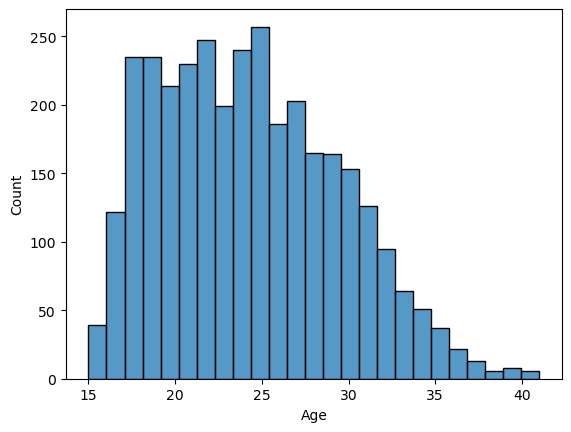

In [39]:
sns.histplot(stats['Age']);

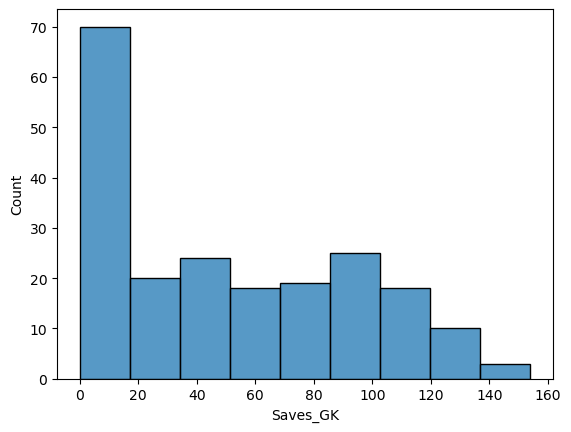

In [40]:
sns.histplot(stats['Saves_GK']);

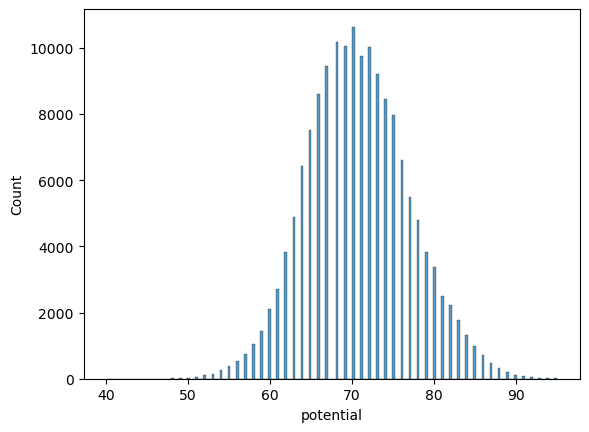

In [41]:
sns.histplot(ea_sports['potential']);

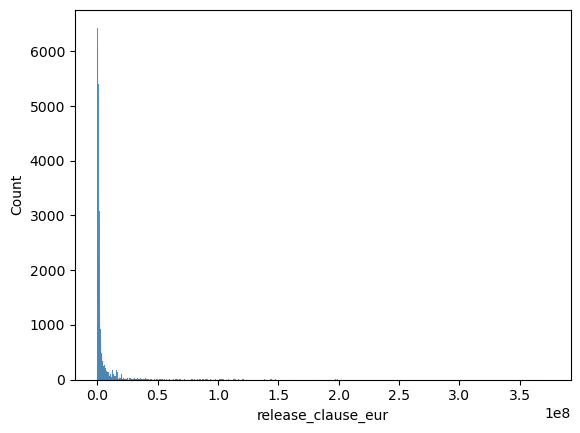

In [42]:
sns.histplot(ea_sports['release_clause_eur']);

## DATA CLEANING AND PREPROCESSING
- Handle missing values (e.g., drop or fill missing entries).
- Standardize column formats and ensure consistency in player names.
- Handle outliers and perform any necessary data transformations (e.g., scaling or normalizing features like physical attributes).

In [305]:
columns_list = stats.columns.tolist()
print(columns_list)

['short_name', 'long_name', 'dob', 'age', 'height_cm', 'weight_kg', 'nationality_name', 'league_name', 'club_name', 'player_positions', 'club_jersey_number', 'club_joined_date', 'club_contract_valid_until_year', 'value_eur', 'wage_eur', 'release_clause_eur', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'skill_dribbling', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_jumping', 'power_stamina', 'power_strength', 'defending_sliding_tackle', 'potential', 'overall', 'goalkeeping_diving', 'goalkeeping_reflexes', 'goalkeeping_speed', 'goals_conceeded_gk', 'saves_gk', 'save_percent_gk', 'clean_sheets_gk', 'clean_sheet_percent_gk', 'launched_passes_completed_gk', 'launched_passes_attempted_gk', 'crosses_stopped_gk', 'mins_per_90', 'starts', 'goals', 'assists', 'g+a_combined', 'yellow_cards', 'red_cards', 'expected_goals', 'expected_g+a', 'prog_carries', 'prog_passes', 'shots', 'shots_on_

In [44]:
columns_list = ea_sports.columns.tolist()
print(columns_list)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

##### Drop Unnecessary Columns and Rows

In [151]:
ea_columns_to_drop = ['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'league_id', 
                    'league_level', 'club_team_id', 'club_position', 'club_loaned_from', 'nationality_id', 'nation_team_id','nation_position', 
                    'nation_jersey_number', 'international_reputation', 'body_type', 'real_face', 'pace', 'shooting', 'passing', 
                    'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                    'attacking_short_passing', 'attacking_volleys', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
                    'power_shot_power', 'power_long_shots','mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 
                    'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 
                    'defending_standing_tackle', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
                    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 
                    'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url'
                  ]

stats_columns_to_drop = ['Comp', 'Pos', 'Age', 'Born', 'MP', 'Minutes_Played', 'Mn_per_MP', 'PPM_Team.Success', 
                         'onG_Team.Success', 'onGA_Team.Success', 'plus_per__minus__Team.Success', 'NonPKG', 'PK', 'PKatt', 
                         'npxG+xAG', 'Gls_Per90', 'Ast_Per90', 'G+A_Per90', 'G_minus_PK_Per', 'G+A_minus_PK_Per', 'xG_Per', 
                         'xAG_Per', 'xG+xAG_Per', 'G_per_Sh', 'G_per_SoT', 'Avg_Shot_Dist', 'FK_Standard', 'G_minus_xG_Expected',
                         'np:G_minus_xG_Expected', 'Passes_Attempted', 'Passes_Cmp_Short', 'Passes_Att_Short', 
                         'Passes_Cmp_percent_Short', 'Passes_Cmp_Medium', 'Passes_Att_Medium', 'Passes_Cmp_percent_Medium', 
                         'Passes_Cmp_Long', 'Passes_Att_Long', 'Passes_Cmp_percent_Long', 'A_minus_xAG_Expected', 
                         'CrsPA', 'TB_Pass', 'Crs_Pass', 'Offside_Passes', 'Blocked_Passes', 
                         'SCA_90', 'TakeOnTo_Shot', 'FoulTo_Shot', 'FoulTo_Shot', 'GCA90', 'TakeOn_Goal', 'Fld_Goal', 'Lost_Challenges',
                         'Passes_Blocked', 'ErrorsLead_ToShot', 'Att_Take', 'Tkld_Take', 'Tkld_percent_Take', 
                         'TotDist_Carries', 'PrgDist_Carries', 'Miscontrolls', 'Dispossessed', '2CrdY','PK_Won', 
                         'PK_Conceded', 'Own_Goals', 'Loose_Ball_Recoveries', 'Lost_Aerial', 'SoT_Against_GK', 'PK_Faced_GK', 
                         'PK_Allowed_GK', 'PK_Saved_GK', 'PK_Missed_GK', 'Save_percent_Penalty_GK', 'FK_Goals_GK', 
                         'CornerKick_Goals_GK', 'OG_GK', 'PSxG_GK', 'PSxG_per_SoT_GK', 'PSxG+_per_minus_GK', 'Cmp_percent_Launched_GK', 
                         'Att_Passes_GK', 'Throws_GK', 'Launch_percent_Passes_GK', 'AvgLen_Passes_GK', 'Att_Goal_Kicks_GK', 'AvgLen_GoalKick_GK', 
                         'CrossesFaced_GK', 'CrossedStopped_Perc_GK', 'OPA_Sweeper_GK', 'OPA_per_90_Sweeper_GK', 'AvgDist_Sweeper_GK'
                        ]

# Define the list of leagues
top_leagues = ['Ligue 1', 'Premier League', 'La Liga', 'Bundesliga', 'Serie A']


In [152]:
# Filter the ea_sports dataset for FIFA23
ea_sports = ea_sports[ea_sports['fifa_version'] == 23]

In [153]:
# Filter the ea_sports dataset for top leagues
ea_sports = ea_sports[ea_sports['league_name'].isin(top_leagues)]

In [154]:
ea_sports.shape

(3645, 110)

In [155]:
# Drop unnecessary columns from ea_sports dataset
ea_sports.drop(columns=ea_columns_to_drop, inplace=True)

In [156]:
# Drop unnecessary columns from stats dataset
stats.drop(columns=stats_columns_to_drop, inplace=True)

##### Fill NaN values with 0

In [157]:
# Fill NaN values with 0 before converting to int
stats.fillna(0, inplace=True)
ea_sports.fillna(0, inplace=True)

##### Split 'player_position' column

In [158]:
ea_sports['player_positions'] = ea_sports['player_positions'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

##### Change Data type

In [159]:
# List of columns to convert
stats_columns_to_convert = ['Starts', 'Goals', 'Assists', 'GoalsAssistsCombined', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'Shots', 
                      'Shots_on_Target', 'Passes_Completed', 'PrgDist_Total', 'Key_Passes', 'Final_Third', 'PPA', 'Shot_Creating_Actions',
                      'DefAction_Shot', 'GoalCreatingAction', 'DefAction_Goal', 'Tackles', 'Tackles_Won', 'Def_3rd_Tackles', 
                      'Mid_3rd_Tackles', 'Att_3rd_Tackles', 'Blocks', 'Sh_Blocked', 'Interceptions', 'Clearances', 'Succ_Take',
                      'Fouls_Comitted', 'Fouls_Drawn', 'Offsides', 'Crosses', 'Won_Aerial', 'Goals_Against_GK', 'Saves_GK', 
                      'Clean_Sheets_GK', 'LaunchedPassesCompleted_GK', 'LaunchedAttempted_GK', 'CrossedStopped_GK'
                     ]
ea_columns_to_convert = ['club_jersey_number', 'club_contract_valid_until_year']

In [160]:
# Convert columns from float to int
stats[stats_columns_to_convert] = stats[stats_columns_to_convert].astype('int')
ea_sports[ea_columns_to_convert] = ea_sports[ea_columns_to_convert].astype('int')

##### Check for Duplicates

In [161]:
# Remove duplicates based on specific columns
stats = stats.drop_duplicates(subset=['Player', 'Starts'])

In [162]:
# Check for duplicates 'Player' column
duplicates_in_stats = stats.duplicated(subset=['Player', 'Starts'])

# Show rows that are duplicates in that column
stats[duplicates_in_stats]


Empty DataFrame
Columns: [Squad, Player, Nation, Mins_Per_90, Starts, Goals, Assists, GoalsAssistsCombined, CrdY, CrdR, xG, xAG, PrgC, PrgP, Shots, Shots_on_Target, SoT_percent, Passes_Completed, Passes_Cmp_percent, PrgDist_Total, xA_Expected, Key_Passes, Final_Third, PPA, Shot_Creating_Actions, DefAction_Shot, GoalCreatingAction, DefAction_Goal, Tackles, Tackles_Won, Def_3rd_Tackles, Mid_3rd_Tackles, Att_3rd_Tackles, Tkl_percent_won, Blocks, Sh_Blocked, Interceptions, Clearances, Succ_Take, Succ_percent_Take, Fouls_Comitted, Fouls_Drawn, Offsides, Crosses, Won_Aerial, Won_percent_Aerial, Goals_Against_GK, Saves_GK, Save_percent_GK, Clean_Sheets_GK, CS_percent_GK, LaunchedPassesCompleted_GK, LaunchedAttempted_GK, CrossedStopped_GK]
Index: []

In [163]:
# Check for duplicates in 'long_name' column
duplicates_in_ea = ea_sports.duplicated(subset=['long_name', 'height_cm'], keep=False)

# Show rows that are duplicates in that column
ea_sports[duplicates_in_ea]

Empty DataFrame
Columns: [short_name, long_name, player_positions, overall, potential, value_eur, wage_eur, age, dob, height_cm, weight_kg, league_name, club_name, club_jersey_number, club_joined_date, club_contract_valid_until_year, nationality_name, preferred_foot, weak_foot, skill_moves, work_rate, release_clause_eur, player_tags, player_traits, skill_dribbling, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_jumping, power_stamina, power_strength, defending_sliding_tackle, goalkeeping_diving, goalkeeping_reflexes, goalkeeping_speed]
Index: []

##### Rename Stats Columns

In [164]:
# Assuming your DataFrame is named 'df'
stats.rename(columns={
    'Player': 'player',
    'Nation': 'nation',
    'Mins_Per_90': 'mins_per_90',
    'Starts': 'starts',
    'Goals': 'goals',
    'Assists': 'assists',
    'GoalsAssistsCombined': 'g+a_combined',
    'CrdY': 'yellow_cards',
    'CrdR': 'red_cards',
    'xG': 'expected_goals',
    'xAG': 'expected_g+a',
    'PrgC': 'prog_carries',
    'PrgP': 'prog_passes',
    'Shots': 'shots',
    'Shots_on_Target': 'shots_on_target',
    'SoT_percent': 'sot_percent',
    'Passes_Completed': 'passes_completed',
    'Passes_Cmp_percent': 'pass_completion_percent',
    'PrgDist_Total': 'prog_pass_dist',
    'xA_Expected': 'expected_assists',
    'Key_Passes': 'key_passes',
    'Final_Third': 'final_third_passes',
    'PPA': 'passes_pen_area',
    'Shot_Creating_Actions': 'shot_creating_actions',
    'DefAction_Shot': 'def_actions_to_shot',
    'GoalCreatingAction': 'goal_creating_actions',
    'DefAction_Goal': 'def_actions_to_goal',
    'Tackles': 'tackles',
    'Tackles_Won': 'tackles_won',
    'Def_3rd_Tackles': 'def_third_tackles',
    'Mid_3rd_Tackles': 'mid_third_tackles',
    'Att_3rd_Tackles': 'att_third_tackles',
    'Tkl_percent_won': 'tackle_win_percent',
    'Blocks': 'blocks',
    'Sh_Blocked': 'shots_blocked',
    'Interceptions': 'interceptions',
    'Clearances': 'clearances',
    'Succ_Take': 'take_ons',
    'Succ_percent_Take': 'take_on_success_percent',
    'Fouls_Comitted': 'fouls_committed',
    'Fouls_Drawn': 'fouls_drawn',
    'Offsides': 'offsides',
    'Crosses': 'crosses',
    'Won_Aerial': 'aerial_duels_won',
    'Won_percent_Aerial': 'aerial_win_percent',
    'Goals_Against_GK': 'goals_conceeded_gk',
    'Saves_GK': 'saves_gk',
    'Save_percent_GK': 'save_percent_gk',
    'Clean_Sheets_GK': 'clean_sheets_gk',
    'CS_percent_GK': 'clean_sheet_percent_gk',
    'LaunchedPassesCompleted_GK': 'launched_passes_completed_gk',
    'LaunchedAttempted_GK': 'launched_passes_attempted_gk',
    'CrossedStopped_GK': 'crosses_stopped_gk'
}, inplace=True)


##### Rename Club Names

In [165]:
club_renaming = {
    'Angers': 'Angers SCO',
    'Augsburg': 'FC Augsburg',
    'Bayern Munich': 'FC Bayern München',
    'Betis': 'Real Betis',
    'Bochum': 'VfL Bochum 1848',
    'Bournemouth': 'AFC Bournemouth',
    'Brighton': 'Brighton & Hove Albion',
    'Clermont Foot': 'Clermont',
    'Dortmund': 'Borussia Dortmund',
    'Eint Frankfurt': 'Eintracht Frankfurt',
    'Freiburg': 'SC Freiburg',
    'Hoffenheim': 'TSG Hoffenheim',
    'Köln': 'FC Köln',
    'Leverkusen': 'Bayer 04 Leverkusen',
    'Lyon': 'Olympique Lyonnais',
    "M'Gladbach": 'Borussia Mönchengladbach',
    'Mainz 05': '1. FSV Mainz 05',
    'Marseille': 'Olympique Marseille',
    'Paris S-G': 'Paris Saint Germain',
    'Stuttgart': 'VfB Stuttgart',
    'Tottenham': 'Tottenham Hotspur',
    'Valladolid': 'Real Valladolid',
    'West Ham': 'West Ham United',
    'Wolfsburg': 'VfL Wolfsburg',
    'Wolves': 'Wolverhampton Wanderers'
}

# Replace squad names in the 'Squad' column
stats['Squad'] = stats['Squad'].replace(club_renaming)

In [102]:
stats.head()

Squad            player nation  mins_per_90  starts  goals  assists  \
0  Ajaccio  Mickaël Alphonse    GLP         15.1      14      0        0   
1  Ajaccio     Cédric Avinel    GLP         19.9      19      1        0   
2  Ajaccio   Mickaël Barreto    FRA         14.7      15      1        1   
3  Ajaccio    Cyrille Bayala    BFA         22.3      25      1        1   
4  Ajaccio    Youcef Belaïli    ALG         12.8      15      6        3   

   g+a_combined  yellow_cards  red_cards  expected_goals  expected_g+a  \
0             0             2          1             0.5           0.7   
1             1             2          1             1.0           0.0   
2             2             1          0             0.9           1.9   
3             2             3          1             2.0           2.0   
4             9             2          0             6.2           3.5   

   prog_carries  prog_passes  shots  shots_on_target  sot_percent  \
0            30           51     10                2         20.0   
1             3           31      3                1         33.3   
2            26           87     19                4         21.1   
3            46           66     22                6         27.3   
4            32           55     27                9         33.3   

   passes_completed  pass_completion_percent  prog_pass_dist  \
0               448                     65.3            3413   
1               607                     85.0            4107   
2               481                     69.2            3373   
3               399                     61.0            2291   
4               328                     71.6            2159   

   expected_assists  key_passes  final_third_passes  passes_pen_area  \
0               0.9          11                  43               10   
1               0.1           0                  13                0   
2               2.1          18                  71               16   
3               1.7          19                  45               14   
4               3.3          21                  35               22   

   shot_creating_actions  def_actions_to_shot  goal_creating_actions  \
0                     19                    1                      0   
1                      3                    0                      1   
2                     30                    1                      1   
3                     43                    4                      2   
4                     47                    0                     10   

   def_actions_to_goal  tackles  tackles_won  def_third_tackles  \
0                    0       35           23                 20   
1                    0       13            7                  8   
2                    0       32           20                 12   
3                    1       53           37                 16   
4                    0       18           10                  3   

   mid_third_tackles  att_third_tackles  tackle_win_percent  blocks  \
0                 11                  4                60.6      17   
1                  5                  0                66.7      20   
2                 17                  3                17.8      17   
3                 20                 17                48.9      20   
4                  9                  6                40.0      10   

   shots_blocked  interceptions  clearances  take_ons  \
0              5             35          44        10   
1             13             15          91         0   
2              0             18          11        23   
3              3             25          21        25   
4              1              5           4        29   

   take_on_success_percent  fouls_committed  fouls_drawn  offsides  crosses  \
0                     52.6               19           15         0       27   
1                      0.0               12            2         0        0   
2                     46.9 

In [103]:
ea_sports.head()

short_name                       long_name player_positions  \
143050        L. Messi  Lionel Andrés Messi Cuccittini               RW   
143051      K. Benzema                   Karim Benzema               CF   
143052  R. Lewandowski              Robert Lewandowski               ST   
143053    K. De Bruyne                 Kevin De Bruyne               CM   
143054       K. Mbappé            Kylian Mbappé Lottin               ST   

        overall  potential    value_eur  wage_eur  age         dob  height_cm  \
143050       91         91   54000000.0  195000.0   35  1987-06-24        169   
143051       91         91   64000000.0  450000.0   34  1987-12-19        185   
143052       91         91   84000000.0  420000.0   33  1988-08-21        185   
143053       91         91  107500000.0  350000.0   31  1991-06-28        181   
143054       91         95  190500000.0  230000.0   23  1998-12-20        182   

        weight_kg     league_name            club_name  club_jersey_number  \
143050         67         Ligue 1  Paris Saint Germain                  30   
143051         81         La Liga          Real Madrid                   9   
143052         81         La Liga         FC Barcelona                   9   
143053         70  Premier League      Manchester City                  17   
143054         73         Ligue 1  Paris Saint Germain                   7   

       club_joined_date  club_contract_valid_until_year nationality_name  \
143050       2021-08-10                            2023        Argentina   
143051       2009-07-09                            2023           France   
143052       2022-07-18                            2025           Poland   
143053       2015-08-30                            2025          Belgium   
143054       2018-07-01                            2024           France   

       preferred_foot  weak_foot  skill_moves      work_rate  \
143050           Left          4            4        Low/Low   
143051          Right          4            4  Medium/Medium   
143052          Right          4            4    High/Medium   
143053          Right          5            4      High/High   
143054          Right          4            5       High/Low   

        release_clause_eur                                        player_tags  \
143050          99900000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
143051         131200000.0                       #Poacher, #Clinical Finisher   
143052         172200000.0  #Aerial Threat, #Distance Shooter, #Clinical F...   
143053         198900000.0  #Dribbler, #Playmaker, #Engine, #Distance Shoo...   
143054         366700000.0  #Speedster, #Dribbler, #Acrobat, #Clinical Fin...   

                                            player_traits  skill_dribbling  \
143050  Finesse Shot, Long Shot Taker (AI), Playmaker ...               95   
143051  Leadership, Finesse Shot, Playmaker (AI), Outs...               87   
143052  Solid Player, Finesse Shot, Outside Foot Shot,...               85   
143053  Injury Prone, Leadership, Early Crosser, Long ...               88   
143054  Solid Player, Flair, Speed Dribbler (AI), Outs...               93   

        skill_ball_control  movement_acceleration  movement_sprint_speed  \
143050                  93                     87                     76   
143051                  91                     79                     80   
143052                  89                     76                     75   
143053                  90                     76                     73   
143054                  91                     97                     97   

        movement_agility  movement_reactions  movement_balance  power_jumping  \
143050                91                  92                95             68   
143051                78                  92                72             79   
143052                77                  93                82             85   
143053                76  

## DATA MERGING
- Merge the Top 5 Leagues and EA Sports datasets on player names or another identifier.
- Verify the merged dataset by checking for duplicates or missing values in the new dataset.

In [166]:
# Copy original datasets to avoid modifying them directly
stats_df = stats.copy()
ea_sports_df = ea_sports.copy()

# Preprocess player names by converting to lowercase and stripping extra whitespace
stats_df['player_clean'] = stats_df['player'].str.lower().str.strip()
ea_sports_df['short_name_clean'] = ea_sports_df['short_name'].str.lower().str.strip()
ea_sports_df['long_name_clean'] = ea_sports_df['long_name'].str.lower().str.strip()

# Optionally, keep only the first and last names by removing middle names
stats_df['player_clean'] = stats_df['player_clean'].apply(lambda x: ' '.join(x.split()[:2]))
ea_sports_df['short_name_clean'] = ea_sports_df['short_name_clean'].apply(lambda x: ' '.join(x.split()[:2]))
ea_sports_df['long_name_clean'] = ea_sports_df['long_name_clean'].apply(lambda x: ' '.join(x.split()[:2]))

# Function to merge datasets on specified columns for exact matching
def exact_merge(left_df, right_df, right_on):
    return pd.merge(left_df, right_df, left_on=['player_clean', 'Squad'], right_on=right_on, how='inner')

# Function to find the best fuzzy match for a name with a specified threshold
def match_names(name, name_list, threshold=85):
    match = process.extractOne(name, name_list, scorer=fuzz.token_sort_ratio)
    if match and match[1] >= threshold:
        return match[0]  # Return the matched name if score meets threshold
    else:
        return None

# Perform exact merge based on short and long names with club names
short_merge_df = exact_merge(stats_df, ea_sports_df, ['short_name_clean', 'club_name'])
long_merge_df = exact_merge(stats_df, ea_sports_df, ['long_name_clean', 'club_name'])

# Create fuzzy-matched names and clubs in stats_df for additional merging
stats_df['fuzzy_matched_name'] = stats_df['player_clean'].apply(lambda x: match_names(x, ea_sports_df['short_name_clean'].tolist()))
stats_df['fuzzy_matched_club'] = stats_df['Squad'].apply(lambda x: match_names(x, ea_sports_df['club_name'].tolist()))

# Create a copy of stats_df for long name matching
long_stats_df = stats_df.copy()
long_stats_df['fuzzy_matched_name'] = long_stats_df['player_clean'].apply(lambda x: match_names(x, ea_sports_df['long_name_clean'].tolist()))
long_stats_df['fuzzy_matched_club'] = long_stats_df['Squad'].apply(lambda x: match_names(x, ea_sports_df['club_name'].tolist()))

# Merge on fuzzy-matched names and clubs
short_merge_df = pd.merge(stats_df, ea_sports_df, left_on=['fuzzy_matched_name', 'fuzzy_matched_club'], right_on=['short_name_clean', 'club_name'], how='inner')
long_merge_df = pd.merge(long_stats_df, ea_sports_df, left_on=['fuzzy_matched_name', 'fuzzy_matched_club'], right_on=['long_name_clean', 'club_name'], how='inner')

# Concatenate results from exact and fuzzy merges, then drop duplicates
df = pd.concat([short_merge_df, long_merge_df], axis=0).reset_index(drop=True)
df = df.drop_duplicates(subset=['player', 'height_cm', 'club_name', 'long_name'])

# Display the head of the final dataframe
df.head()


Squad          player nation  mins_per_90  starts  goals  assists  \
0  Almería  Álex Centelles    ESP         12.5      11      1        2   
1  Almería      Samu Costa    POR         22.1      22      1        2   
2  Almería     Rodrigo Ely    BRA         35.1      36      0        1   
3  Almería        Fernando    ESP         36.5      37      0        0   
4  Almería     Diego Fuoli    ESP          0.0       0      0        0   

   g+a_combined  yellow_cards  red_cards  expected_goals  expected_g+a  \
0             3             0          1             0.4           1.3   
1             3             5          0             1.7           1.0   
2             1            10          1             1.0           0.8   
3             0             3          0             0.0           0.0   
4             0             0          0             0.0           0.0   

   prog_carries  prog_passes  shots  shots_on_target  sot_percent  \
0            17           35      5                2         40.0   
1             9           91     20                7         35.0   
2             6           52     19                1          5.3   
3             0            0      0                0          0.0   
4             0            0      0                0          0.0   

   passes_completed  pass_completion_percent  prog_pass_dist  \
0               412                     71.4            2965   
1               864                     78.8            5134   
2              1197                     81.2           10151   
3               919                     70.0           20366   
4                 0                      0.0               0   

   expected_assists  key_passes  final_third_passes  passes_pen_area  \
0               1.1          13                  32                9   
1               1.0          13                  68               11   
2               0.6           6                  54                3   
3               0.0           0                  16                0   
4               0.0           0                   0                0   

   shot_creating_actions  def_actions_to_shot  goal_creating_actions  \
0                     24                    0                      4   
1                     47                    3                      3   
2                     21                    0                      2   
3                      4                    0                      0   
4                      0                    0                      0   

   def_actions_to_goal  tackles  tackles_won  def_third_tackles  \
0                    0       22           14                 16   
1                    0       61           31                 35   
2                    0       30           21                 26   
3                    0        0            0                  0   
4                    0        0            0                  0   

   mid_third_tackles  att_third_tackles  tackle_win_percent  blocks  \
0                  3                  3                72.7      13   
1                 20                  6                47.5      29   
2                  4                  0                72.0      46   
3                  0                  0                 0.0       2   
4                  0                  0                 0.0       0   

   shots_blocked  interceptions  clearances  take_ons  \
0              2             11          40         6   
1              7             37          64         9   
2             33             31         203         5   
3              0              1          20         1   
4              0              0           0         0   

   take_on_success_percent  fouls_committed  fouls_drawn  offsides  crosses  \
0                     42.9                7            5         0       46   
1                     40.9               51           44         4        8   
2                     71.4             

In [167]:
columns_to_drop = ['Squad', 'player', 'nation', 'player_clean', 'fuzzy_matched_name', 
                   'fuzzy_matched_club', 'short_name_clean', 'long_name_clean'
                  ]
# Drop unnecessary columns from ea_sports dataset
df.drop(columns=columns_to_drop, inplace=True)

In [168]:
columns_list = long_merge_df.columns.tolist()
print(len(columns_list))

97


In [169]:
columns_list = df.columns.tolist()
print(len(columns_list))

89


In [170]:
# Define the new column order
column_order = [
    # Player Identifiers and Information
    'short_name', 'long_name', 'dob', 'age', 'height_cm', 'weight_kg', 'nationality_name', 
    'league_name', 'club_name', 'player_positions', 'club_jersey_number', 'club_joined_date', 'club_contract_valid_until_year',

    # Financial Attributes
    'value_eur', 'wage_eur', 'release_clause_eur',

    # Physical and Skill Attributes
    'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'skill_dribbling', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_jumping', 'power_stamina', 'power_strength', 'defending_sliding_tackle', 'potential', 'overall',

    # Goalkeeping Attributes
    'goalkeeping_diving', 'goalkeeping_reflexes', 'goalkeeping_speed', 'goals_conceeded_gk', 'saves_gk', 'save_percent_gk', 
    'clean_sheets_gk', 'clean_sheet_percent_gk', 'launched_passes_completed_gk', 'launched_passes_attempted_gk', 'crosses_stopped_gk',

    # Performance Stats
    'mins_per_90', 'starts', 'goals', 'assists', 'g+a_combined', 'yellow_cards', 'red_cards', 'expected_goals', 
    'expected_g+a', 'prog_carries', 'prog_passes', 'shots', 'shots_on_target', 'sot_percent', 'passes_completed', 
    'pass_completion_percent', 'prog_pass_dist', 'expected_assists', 'key_passes', 'final_third_passes', 'shot_creating_actions',
    'passes_pen_area', 'def_actions_to_shot', 'goal_creating_actions', 'def_actions_to_goal',

    # Defensive Stats
    'tackles', 'tackles_won', 'def_third_tackles', 'mid_third_tackles', 'att_third_tackles', 'tackle_win_percent', 
    'blocks', 'shots_blocked', 'interceptions', 'clearances',

    # Other Actions and Miscellaneous Stats
    'take_ons', 'take_on_success_percent', 'fouls_committed', 'fouls_drawn', 'offsides', 'crosses', 'aerial_duels_won', 'aerial_win_percent',

    # Additional Player Traits
    'player_tags', 'player_traits'
]

# Reorder the DataFrame columns
df = df[column_order]


In [171]:
df.tail()

short_name                   long_name         dob  age  height_cm  \
2251   C. Campbell               Chem Campbell  2002-12-30   19        180   
2252  D. Lembikisa            Dexter Lembikisa  2003-11-04   18        177   
2253   Y. Mosquera  Yerson Mosquera Valdelamar  2001-05-02   21        187   
2254     M. Šarkić               Matija Šarkić  1997-07-23   24        195   
2256     B. Traoré             Boubacar Traoré  2001-08-20   20        183   

      weight_kg nationality_name     league_name                club_name  \
2251         72            Wales  Premier League  Wolverhampton Wanderers   
2252         68          Jamaica  Premier League  Wolverhampton Wanderers   
2253         76         Colombia  Premier League  Wolverhampton Wanderers   
2254         76       Montenegro  Premier League  Wolverhampton Wanderers   
2256         67             Mali  Premier League  Wolverhampton Wanderers   

     player_positions  club_jersey_number club_joined_date  \
2251              CAM                  77       2019-10-30   
2252              RWB                  81       2021-11-10   
2253               CB                  14       2021-06-17   
2254               GK                  13       2020-07-27   
2256               CM                   6                0   

      club_contract_valid_until_year  value_eur  wage_eur  release_clause_eur  \
2251                            2023   625000.0    6000.0           1600000.0   
2252                            2023   300000.0    2000.0            758000.0   
2253                            2025  1400000.0   10000.0           3500000.0   
2254                            2025  1500000.0   16000.0           3200000.0   
2256                            2023  1300000.0    2000.0                 0.0   

     preferred_foot  weak_foot  skill_moves      work_rate  skill_dribbling  \
2251          Right          4            4    High/Medium               66   
2252           Left          5            2    High/Medium               52   
2253          Right          3            2    Medium/High               28   
2254          Right          2            1  Medium/Medium               12   
2256          Right          2            2  Medium/Medium               67   

      skill_ball_control  movement_acceleration  movement_sprint_speed  \
2251                  65                     75                     67   
2252                  54                     76                     77   
2253                  60                     67                     80   
2254                  25                     40                     33   
2256                  69                     54                     58   

      movement_agility  movement_reactions  movement_balance  power_jumping  \
2251                71                  53                74             59   
2252                68                  52                76             60   
2253                61                  62                55             73   
2254                33                  66                28             52   
2256                69                  66                70             64   

      power_stamina  power_strength  defending_sliding_tackle  potential  \
2251             55              53                        43         78   
2252             48              44                        47         72   
2253             59              73                        63         78   
2254             20              42                        14         74   
2256             62              73                        60         75   

      overall  goalkeeping_diving  goalkeeping_reflexes  goalkeeping_speed  \
2251       60                  11                     7                0.0   
2252       55                  10                     7                0.0   
2253       64                   8                     8                0.0   
2254       68                  68                   

In [172]:
df.shape

(2010, 89)

## FEATURE ENGINEERING
- Create new performance metrics (e.g., goals per 90 minutes, assists per 90).
- Calculate potential vs. performance ratios (e.g., real-life performance divided by EA potential rating).
- Group players by categories (e.g., by age, league, or position).

##### Performance Metrics

In [173]:
df['goal_contribution_per_90'] = (df['goals'] + df['assists']) / df['mins_per_90']

In [174]:
df['attacking_involvement'] = df['key_passes'] + df['final_third_passes'] + df['passes_pen_area']

In [175]:
df['sca_per_90'] = df['shot_creating_actions'] / df['mins_per_90']

In [176]:
df['gca_per_90'] = df['goal_creating_actions'] / df['mins_per_90']

In [177]:
df['key_passes_per_90'] = df['key_passes'] / df['mins_per_90']

In [178]:
df['defensive_efficiency'] = (df['tackles'] + df['interceptions'] + df['blocks']) / df['mins_per_90']

In [179]:
df['goal_efficiency'] = df['goals'] / df['expected_goals']

In [180]:
df['assist_efficiency'] = df['assists'] / df['expected_assists']

##### Potential vs. Performance Differentials

In [181]:
df['performance_gap'] = df['overall'] - df['potential']

In [182]:
df['value_per_goal'] = df['value_eur'] / df['goals']

In [183]:
df['is_under_23'] = df['age'] < 23

##### Position-Specific Metrics

In [184]:
df['save_percentage'] = df['saves_gk'] / (df['saves_gk'] + df['goals_conceeded_gk'])
df['clean_sheet_ratio'] = df['clean_sheets_gk'] / df['starts']

In [185]:
df['goal_accuracy'] = df['shots_on_target'] / df['shots']

In [186]:
df['tackle_success_rate'] = df['tackles_won'] / df['tackles']

##### League-Based Performance Indicators

In [301]:
league_avg = df.groupby('league_name').mean(numeric_only=True)
df = df.merge(league_avg, on='league_name', suffixes=('', '_league_avg'))
df['goals_vs_league_avg'] = df['goals'] / df['goals_league_avg']

##### Physical and Skill-Based Factors

In [188]:
df['technical_skills_score'] = (df['skill_dribbling'] + df['skill_ball_control'] + df['movement_agility']) / 3

##### Feature Interactions and Ratios

In [189]:
df['goals_per_shot'] = df['goals'] / df['shots']

In [190]:
df['tackles_per_take_on'] = df['tackles'] / df['take_ons']

In [388]:
df['performance_efficiency'] = (
    df['goal_contribution_per_90'] +
    df['defensive_efficiency'] +
    df['goal_efficiency'] +
    df['assist_efficiency']
)

In [349]:
df[df['player_positions'].str.contains('GK')]

short_name                       long_name         dob  age  \
3                  Fernando         Fernando Martínez Rubio  1990-06-10   32   
4               Diego Fuoli      Diego Licinio Lázaro Fuoli  1997-10-20   24   
9             P. Bernardoni   Paul Jean François Bernardoni  1997-04-18   25   
33               Unai Simón             Unai Simón Mendibil  1997-06-11   25   
41            Antonio Gomis            Antonio Gomis Alemañ  2003-05-20   19   
60               Iñaki Peña           Ignacio Peña Sotorres  1999-03-02   23   
63              Arnau Tenas               Arnau Tenas Ureña  2001-05-30   21   
76              Dani Martín         Daniel Martín Fernández  1998-07-08   23   
80                Rui Silva       Rui Tiago Dantas da Silva  1994-02-07   28   
84                     Neto            Norberto Murara Neto  1989-07-19   32   
88               David Raya               David Raya Martin  1995-09-15   26   
89           Robert Sánchez            Robert Lynch Sánchez  1997-11-18   24   
102             Iván Villar            Iván Villar Martínez  1997-07-09   24   
109            S. Johnstone                   Sam Johnstone  1993-03-25   29   
117               David Gil              David Gil Mohedano  1994-01-11   28   
140          Juanpe Navarro     Juan Pedro Navarro Valverde  1998-08-21   23   
146                 Fortuño             Ángel Fortuño Viñas  2001-11-05   20   
147             Joan García                Joan García Pons  2001-05-04   21   
169            Kiko Casilla        Francisco Casilla Cortés  1986-10-02   35   
170             Diego Conde       Diego José Conde Alcolado  1998-10-28   23   
177             David Soria               David Soria Solís  1993-04-04   29   
179             Juan Carlos       Juan Carlos Martín Corral  1988-01-20   34   
182            Toni Fuidias             Toni Fuidias Ribera  2001-04-15   21   
208          Luís Maximiano   Luís Manuel Arantes Maximiano  1999-01-05   23   
219             Joel Robles            Joel Robles Blázquez  1990-06-17   32   
229              Léo Jardim           Leonardo César Jardim  1995-03-20   27   
231                  Adrián  Adrián San Miguel del Castillo  1987-01-03   35   
233                 Alisson           Alisson Ramsés Becker  1992-10-02   29   
239   T. Bartouche-Selbonne        Teddy Bartouche-Selbonne  1997-06-05   25   
245           J. Olschowsky            Jan Jakob Olschowsky  2001-11-18   20   
249               Pere Joan          Pere Joan García Bauzà  2002-03-22   20   
256                 Ederson       Ederson Santana de Moraes  1993-08-17   28   
267            Rubén Blanco              Rubén Blanco Veiga  1995-07-25   26   
269               Pau López                Pau López Sabata  1994-12-13   27   
270       S. Ngapandouetnbu      Simon Brady Ngapandouetnbu  2003-04-12   19   
279          Matis Carvalho                  Matis Carvalho  1999-04-28   23   
307          Sergio Herrera            Sergio Herrera Pirón  1993-06-06   29   
312              Juan Pérez          Juan Manuel Pérez Ruiz  1996-07-15   25   
313             Darío Ramos              Darío Ramos Pinazo  1999-10-19   22   
317          Pablo Valencia           Pablo Valencia García  2001-03-16   21   
323             Sergio Rico            Sergio Rico González  1993-09-01   28   
338             Diego López           Diego López Rodríguez  1981-11-03   40   
346              Luis López     Luis Federico López Andúgar  2001-05-08   21   
355            Unai Marrero          Unai Marrero Larrañaga  2001-10-09   20   
361             Álex Remiro       Alejandro Remiro Gargallo  1995-03-24   27   
365            Rui Patrício   Rui Pedro dos Santos Patrício  1988-02-15   34   
389     V. Milinković-Savić          Vanja Milinković-Savić  1997-02-20   25   
403           Emilio Bernad          Emilio Bernard Sánchez  1999-09-22   22   
415           Sergio Asenjo            Sergio Asenjo Andrés  1989-06-28   33   
418             J

## EXPLORATORY DATA ANALYSIS
- Compare real-life player performance with EA Sports potential ratings.
- Visualize over- and under-performing players.
- Highlight top players by position, league, and potential.
- Focus on young players under 23 and compare their real-life growth to their potential.

##### Basic Descriptive Analysis

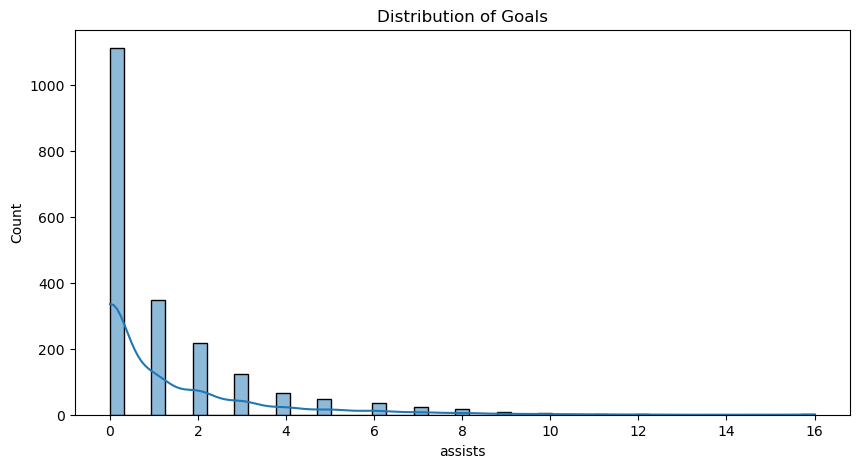

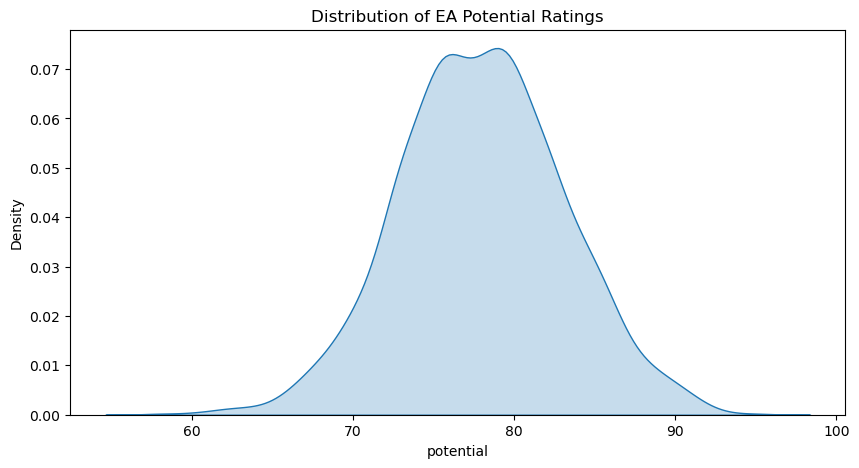

In [131]:
# Histogram for Goals
plt.figure(figsize=(10, 5))
sns.histplot(df['assists'], kde=True)
plt.title("Distribution of Goals")
plt.show()

# KDE Plot for Potential Ratings
plt.figure(figsize=(10, 5))
sns.kdeplot(df['potential'], fill=True)
plt.title("Distribution of EA Potential Ratings")
plt.show()


##### Segmenting Players by EA Potential Ratings

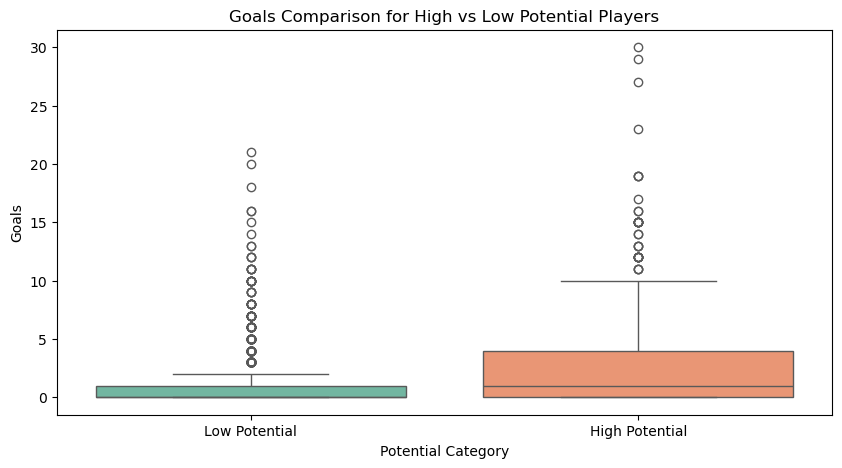

In [132]:
# Define categories for Potential Ratings
df['Potential Category'] = pd.cut(df['potential'], bins=[0, 80, 100], labels=['Low Potential', 'High Potential'])

# Set the plot size
plt.figure(figsize=(10, 5))

# Create boxplot with Potential Category as hue
sns.boxplot(data=df, x='Potential Category', y='goals', hue='Potential Category', palette="Set2", dodge=False, legend=False)
plt.title("Goals Comparison for High vs Low Potential Players")
plt.xlabel("Potential Category")
plt.ylabel("Goals")
plt.show()


##### Identifying Overperformers and Underperformers

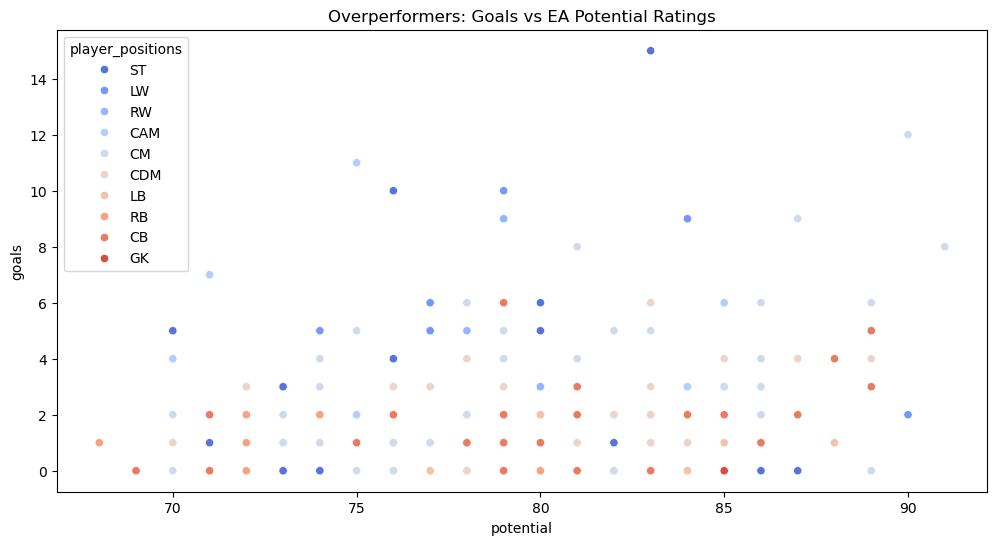

In [432]:
# Overperformers: Players whose goals exceed their EA rating goals
# Calculate 25th and 75th percentiles
performance_25th = df['performance_efficiency'].quantile(0.25)
performance_75th = df['performance_efficiency'].quantile(0.75)

# Define Overperformers and Underperformers
overperformers = df[df['performance_efficiency'] > performance_75th]
underperformers = df[df['performance_efficiency'] < performance_25th]

# Define the order of positions
position_order = ['ST', 'LW', 'RW', 'CAM', 'CM', 'CDM', 'LB', 'RB', 'CB', 'GK']

# Convert player_positions to a categorical type with the specified order
df['player_positions'] = pd.Categorical(df['player_positions'].str.strip(), categories=position_order, ordered=True)

# Visualizing Overperformers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=overperformers, x='potential', y='goals', hue='player_positions', palette='coolwarm')
plt.title("Overperformers: Goals vs EA Potential Ratings")
plt.show()


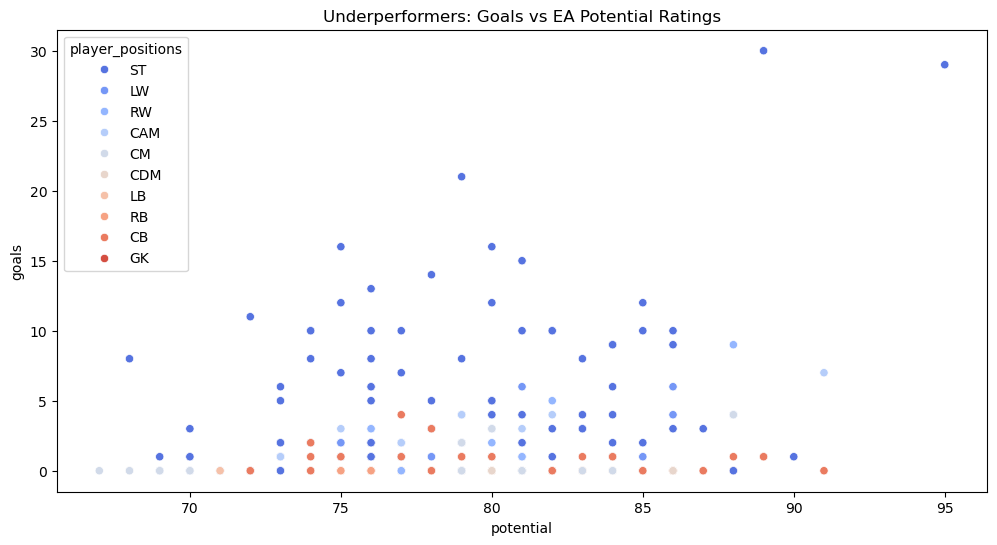

In [431]:
# Visualizing Overperformers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=underperformers, x='potential', y='goals', hue='player_positions', palette='coolwarm')
plt.title("Underperformers: Goals vs EA Potential Ratings")
plt.show()


##### Comparing Performance by Position

In [428]:
# Example Composite Performance Index calculation
def calculate_performance_index(row):
    if row['player_positions'] in ['ST', 'LW', 'RW', 'CF']:  # Forward positions
        return (row['goals'] + row['assists'] + row['shots_on_target']) / row['potential']  # Goals + Assists
    elif row['player_positions'] in ['CM', 'CDM', 'CAM', 'RM', 'LM']:  # Midfielders
        return (row['assists'] + row['key_passes']) / row['potential']  # Assists + Key Passes
    elif row['player_positions'] in ['CB', 'LB', 'RB', 'LWB', 'RWB']:  # Defenders
        return (row['tackles_won'] + row['interceptions']) / row['potential']  # Tackles + Interceptions
    elif row['player_positions'] == 'GK':  # Goalkeepers
        return ((row['saves_gk']  * 0.5) + row['clean_sheets_gk']) / row['potential']  # Saves
    else:
        return 0  # Default case

# Apply function to DataFrame
df['performance_index'] = df.apply(calculate_performance_index, axis=1)

# Calculate 25th and 75th percentiles
performance_25th = df['performance_index'].quantile(0.25)
performance_75th = df['performance_index'].quantile(0.75)

# Define Overperformers and Underperformers
overperformers = df[df['performance_index'] > 1.0]
underperformers = df[df['performance_index'] < 0.3]

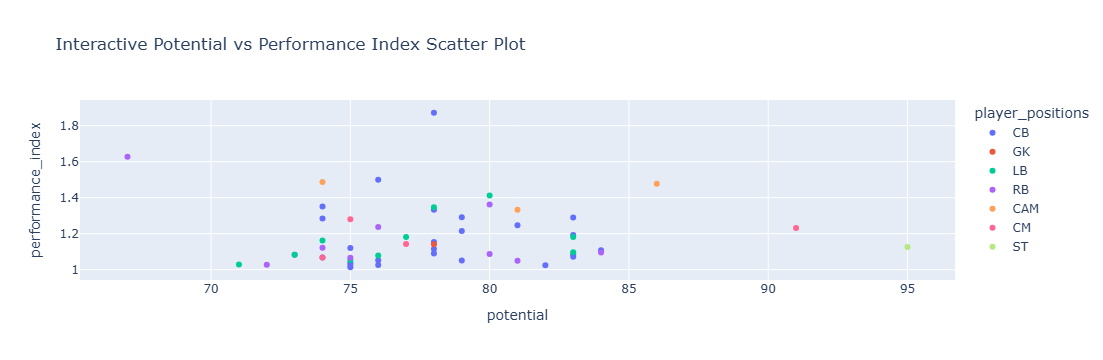

In [429]:
# Interactive Scatter Plot for Potential vs Goals
fig = px.scatter(overperformers, 
                 x='potential', 
                 y='performance_index', 
                 color='player_positions', 
                 hover_name='short_name', 
                 title="Interactive Potential vs Performance Index Scatter Plot"
                )
fig.show()

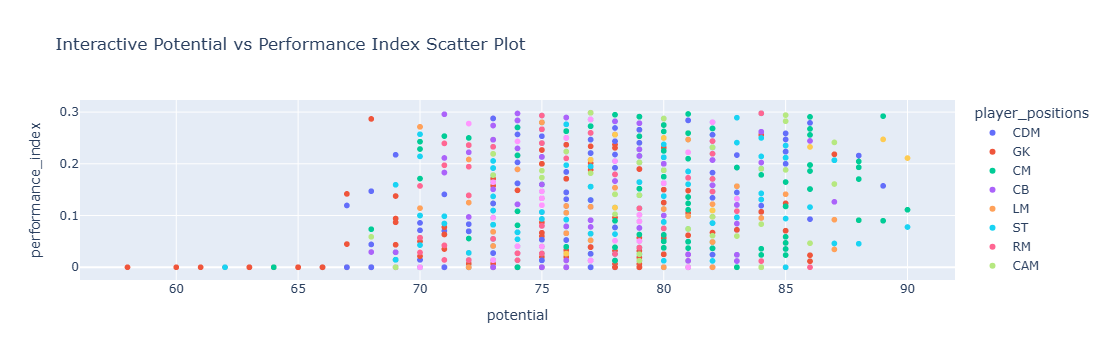

In [427]:
# Interactive Scatter Plot for Potential vs Goals
fig = px.scatter(underperformers, 
                 x='potential', 
                 y='performance_index', 
                 color='player_positions', 
                 hover_name='short_name', 
                 title="Interactive Potential vs Performance Index Scatter Plot"
                )
fig.show()

##### Comparing Goals by Position

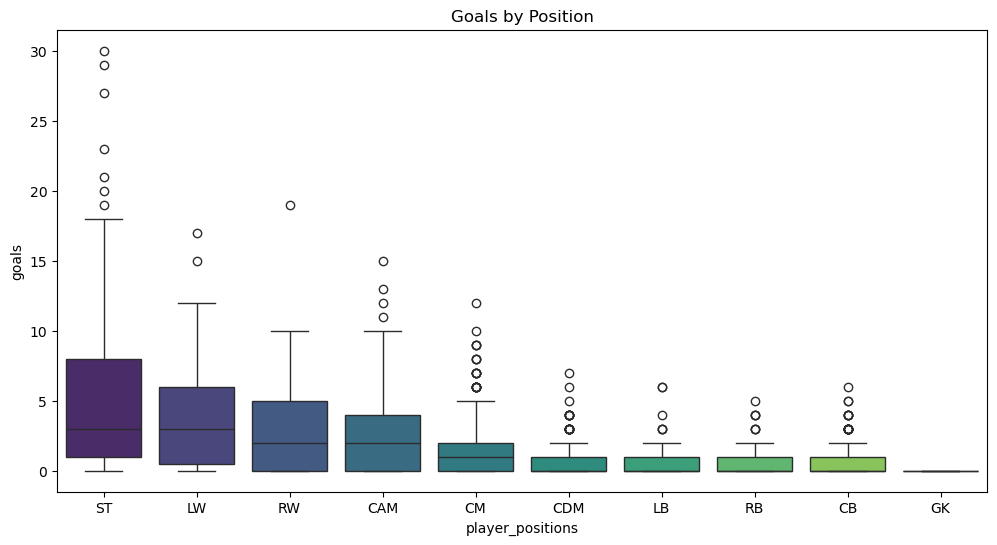

In [136]:
# Boxplot for Goals by Position
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='player_positions', y='goals', hue='player_positions', palette="viridis", dodge=False, legend=False)
plt.title("Goals by Position")
plt.show()

##### Age Group Analysis

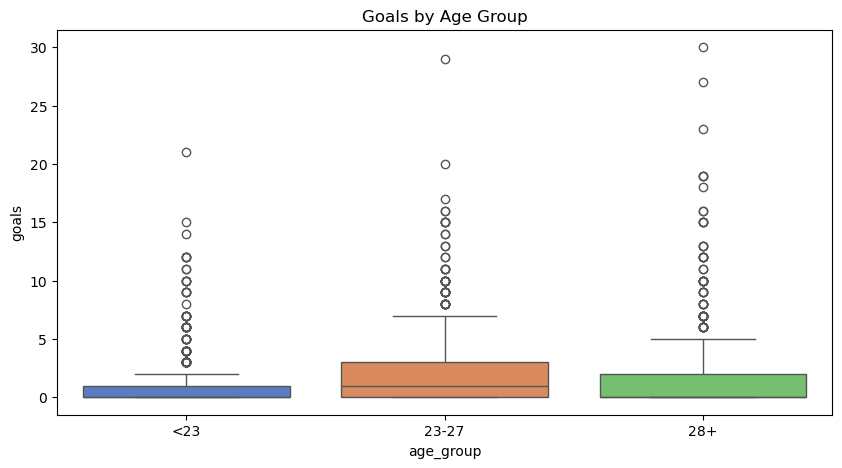

In [434]:
# Define Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 22, 27, 100], labels=['<23', '23-27', '28+'])

# Goals by Age Group
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='age_group', y='goals', hue='age_group', palette="muted", dodge=False, legend=False)
plt.title("Goals by Age Group")
plt.show()

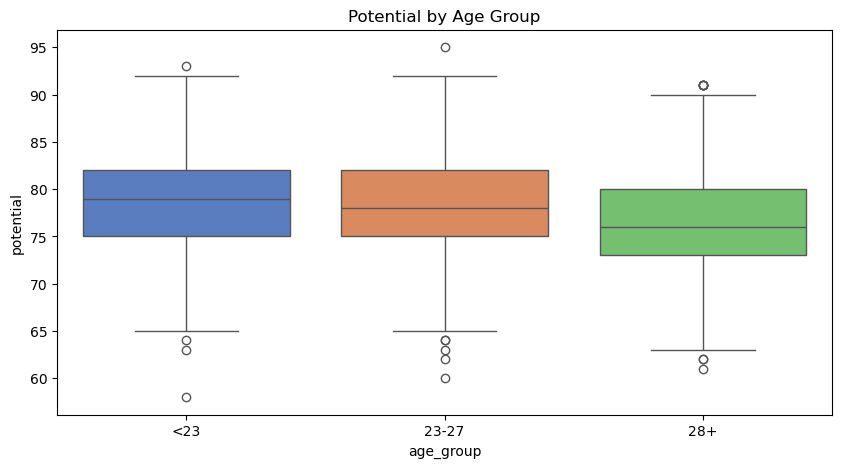

In [138]:
# Define Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 22, 27, 100], labels=['<23', '23-27', '28+'])

# Potential by Age Group
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='age_group', y='potential', hue='age_group', palette="muted", dodge=False, legend=False)
plt.title("Potential by Age Group")
plt.show()

##### League Performance Comparison

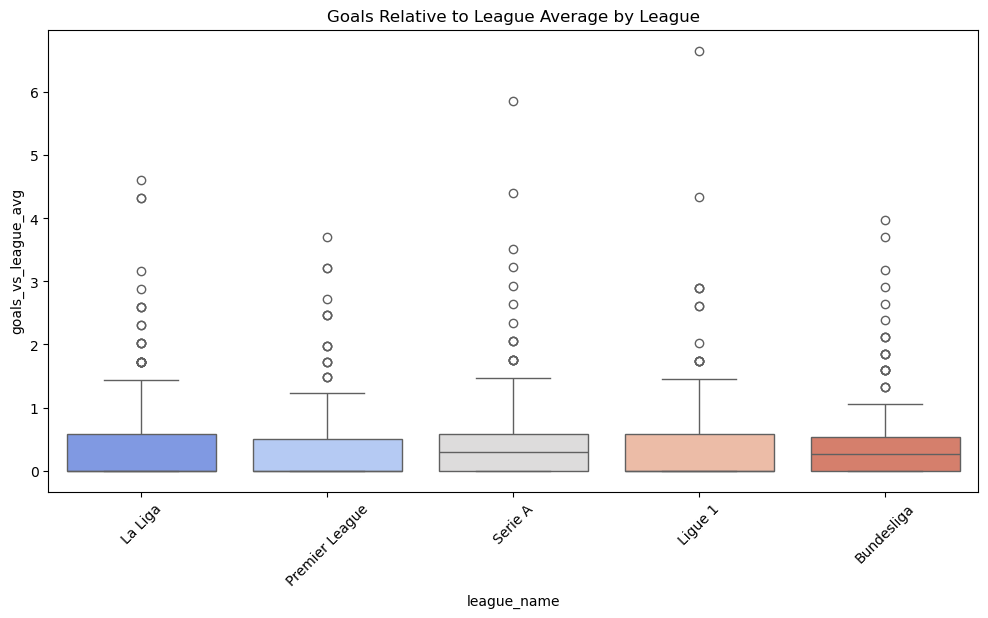

In [298]:
# Filter out players with 0 goals
df_filtered = df[df['goals'] > 0]

# Calculate League Averages
league_avg = df_filtered.groupby('league_name')[['goals', 'assists']].mean().reset_index()
df_filtered = df_filtered.merge(league_avg, on='league_name', suffixes=('', '_league_avg'))

# Goals vs League Average
df_filtered['goals_vs_league_avg'] = df['goals'] / df_filtered['goals_league_avg']

# Visualize Goals vs League Average
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='league_name', y='goals_vs_league_avg', hue='league_name', palette="coolwarm", dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title("Goals Relative to League Average by League")
plt.show()

##### Correlation Matrix


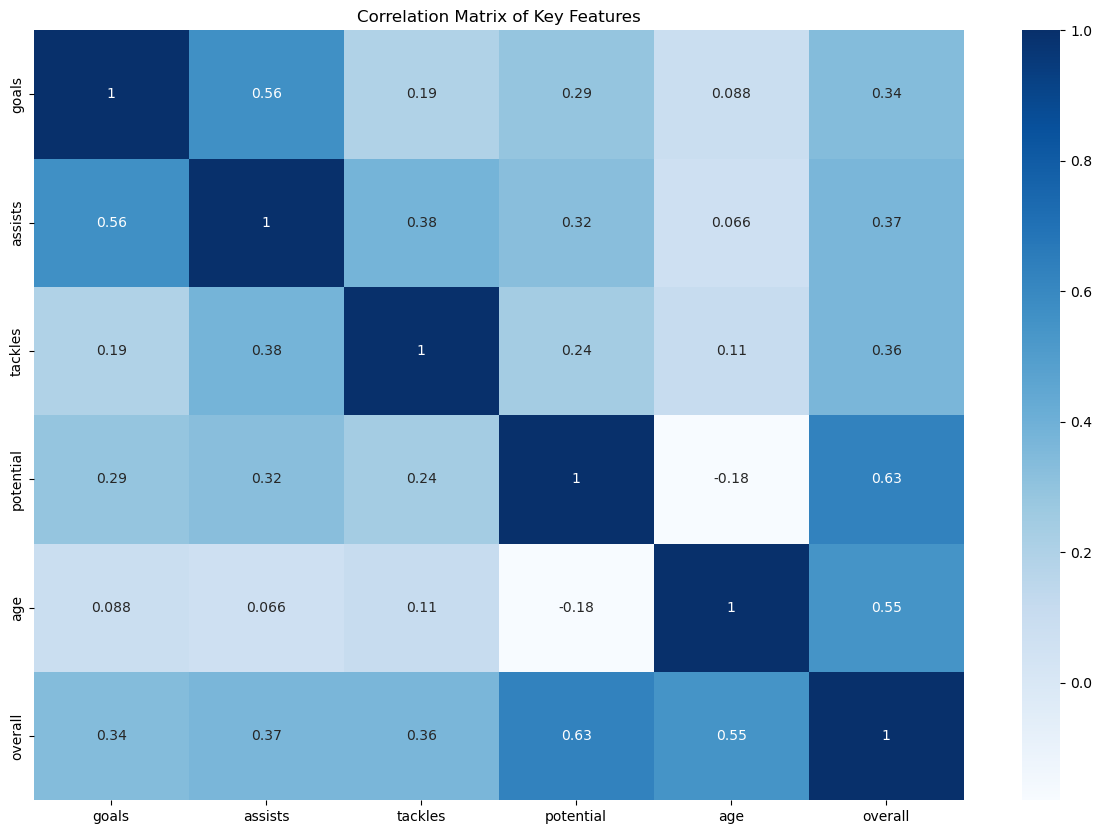

In [141]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[['goals', 'assists', 'tackles', 'potential', 'age', 'overall']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix of Key Features")
plt.show()

##### Targeted Correlations by Position

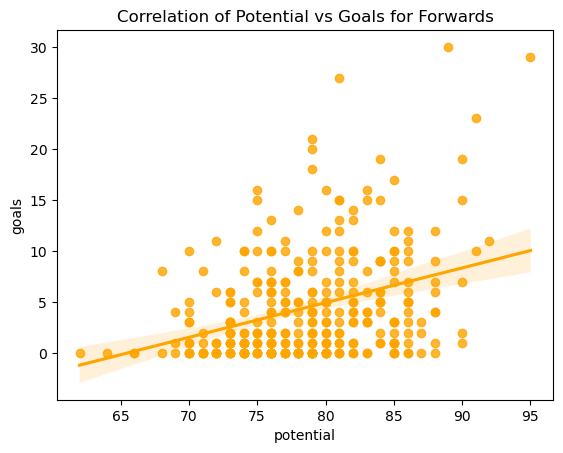

In [142]:
# Correlation for Forwards only
forwards = df[df['player_positions'].isin(['ST', 'CF', 'RW', 'LW'])]
sns.regplot(data=forwards, x='potential', y='goals', color='orange')
plt.title("Correlation of Potential vs Goals for Forwards")
plt.show()

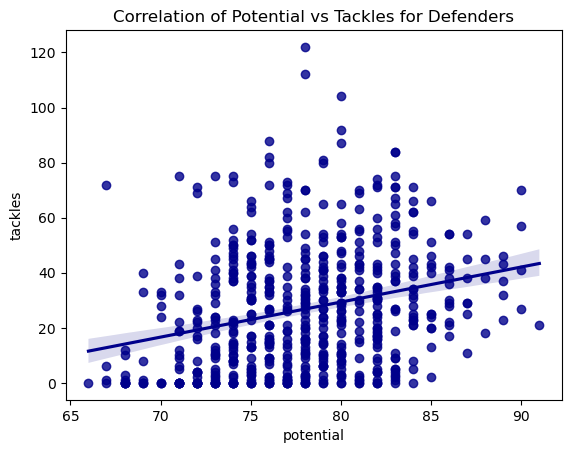

In [440]:
# Correlation for Defenders only
forwards = df[df['player_positions'].isin(['CB', 'LB', 'RB', 'LWB', 'RWB'])]
sns.regplot(data=forwards, x='potential', y='tackles', color='darkblue')
plt.title("Correlation of Potential vs Tackles for Defenders")
plt.show()

##### Potential vs Real-Life Metric Trends

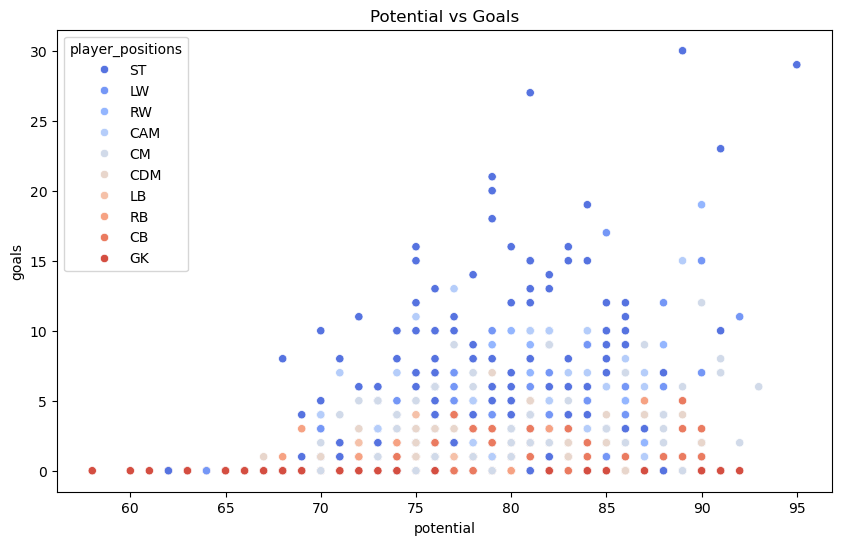

In [143]:
# Scatter Plot of Potential vs Goals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='potential', y='goals', hue='player_positions', palette='coolwarm')
plt.title("Potential vs Goals")
plt.show()

##### Year of Contract End vs. Performance

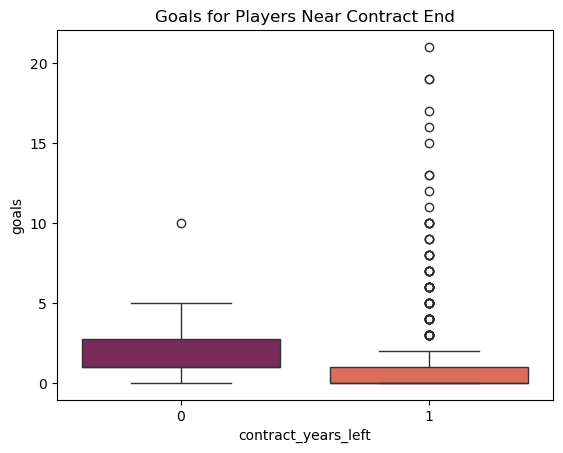

In [144]:
# Performance vs Contract Year for Players Near Contract End
df['contract_years_left'] = df['club_contract_valid_until_year'] - 2022
sns.boxplot(data=df[df['contract_years_left'] <= 1], x='contract_years_left', y='goals', hue='contract_years_left', palette="rocket", dodge=False, legend=False)
plt.title("Goals for Players Near Contract End")
plt.show()

##### Interactive Data Visualization 

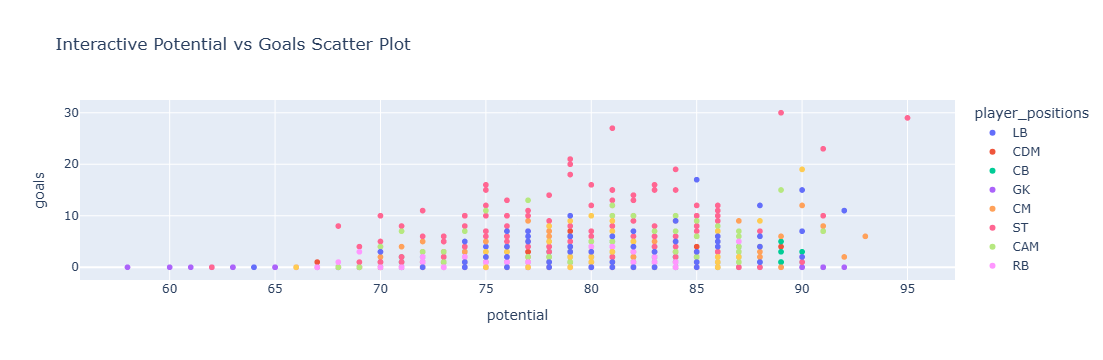

In [145]:
import plotly.express as px

# Interactive Scatter Plot for Potential vs Goals
fig = px.scatter(df, x='potential', y='goals', color='player_positions', hover_name='short_name', title="Interactive Potential vs Goals Scatter Plot")
fig.show()

## CONCLUSIONS AND INSIGHTS
- Summarize key findings from the analysis (e.g., standout players, potential underperformers, promising young talents).
- Discuss how these insights can inform player scouting or recruitment decisions.